In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [36]:
df = pd.read_csv('winequality-red.csv',index_col=0)

In [37]:
df.head()

volatile acidity  citric acid  residual sugar  chlorides  \
fixed acidity                                                             
7.4                        0.70         0.00             1.9      0.076   
7.8                        0.88         0.00             2.6      0.098   
7.8                        0.76         0.04             2.3      0.092   
11.2                       0.28         0.56             1.9      0.075   
7.4                        0.70         0.00             1.9      0.076   

               free sulfur dioxide  total sulfur dioxide  density    pH  \
fixed acidity                                                             
7.4                           11.0                  34.0   0.9978  3.51   
7.8                           25.0                  67.0   0.9968  3.20   
7.8                           15.0                  54.0   0.9970  3.26   
11.2                          17.0                  60.0   0.9980  3.16   
7.4                           11.0                  34.0   0.9978  3.51   

               sulphates  alcohol  quality  
fixed acidity                               
7.4                 0.56      9.4        5  
7.8                 0.68      9.8        5  
7.8                 0.65      9.8        5  
11.2                0.58      9.8        6  
7.4                 0.56      9.4        5

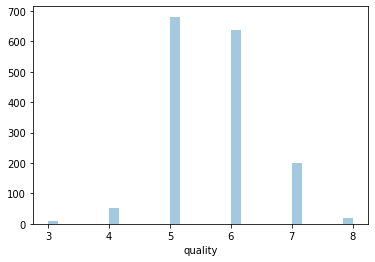

In [38]:
sns.distplot(df['quality'],kde=False,bins=30)

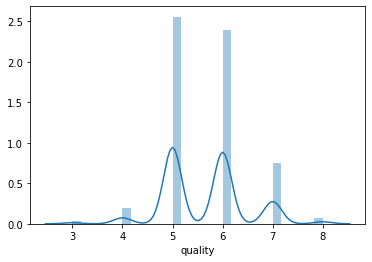

In [39]:
sns.distplot(df['quality'])

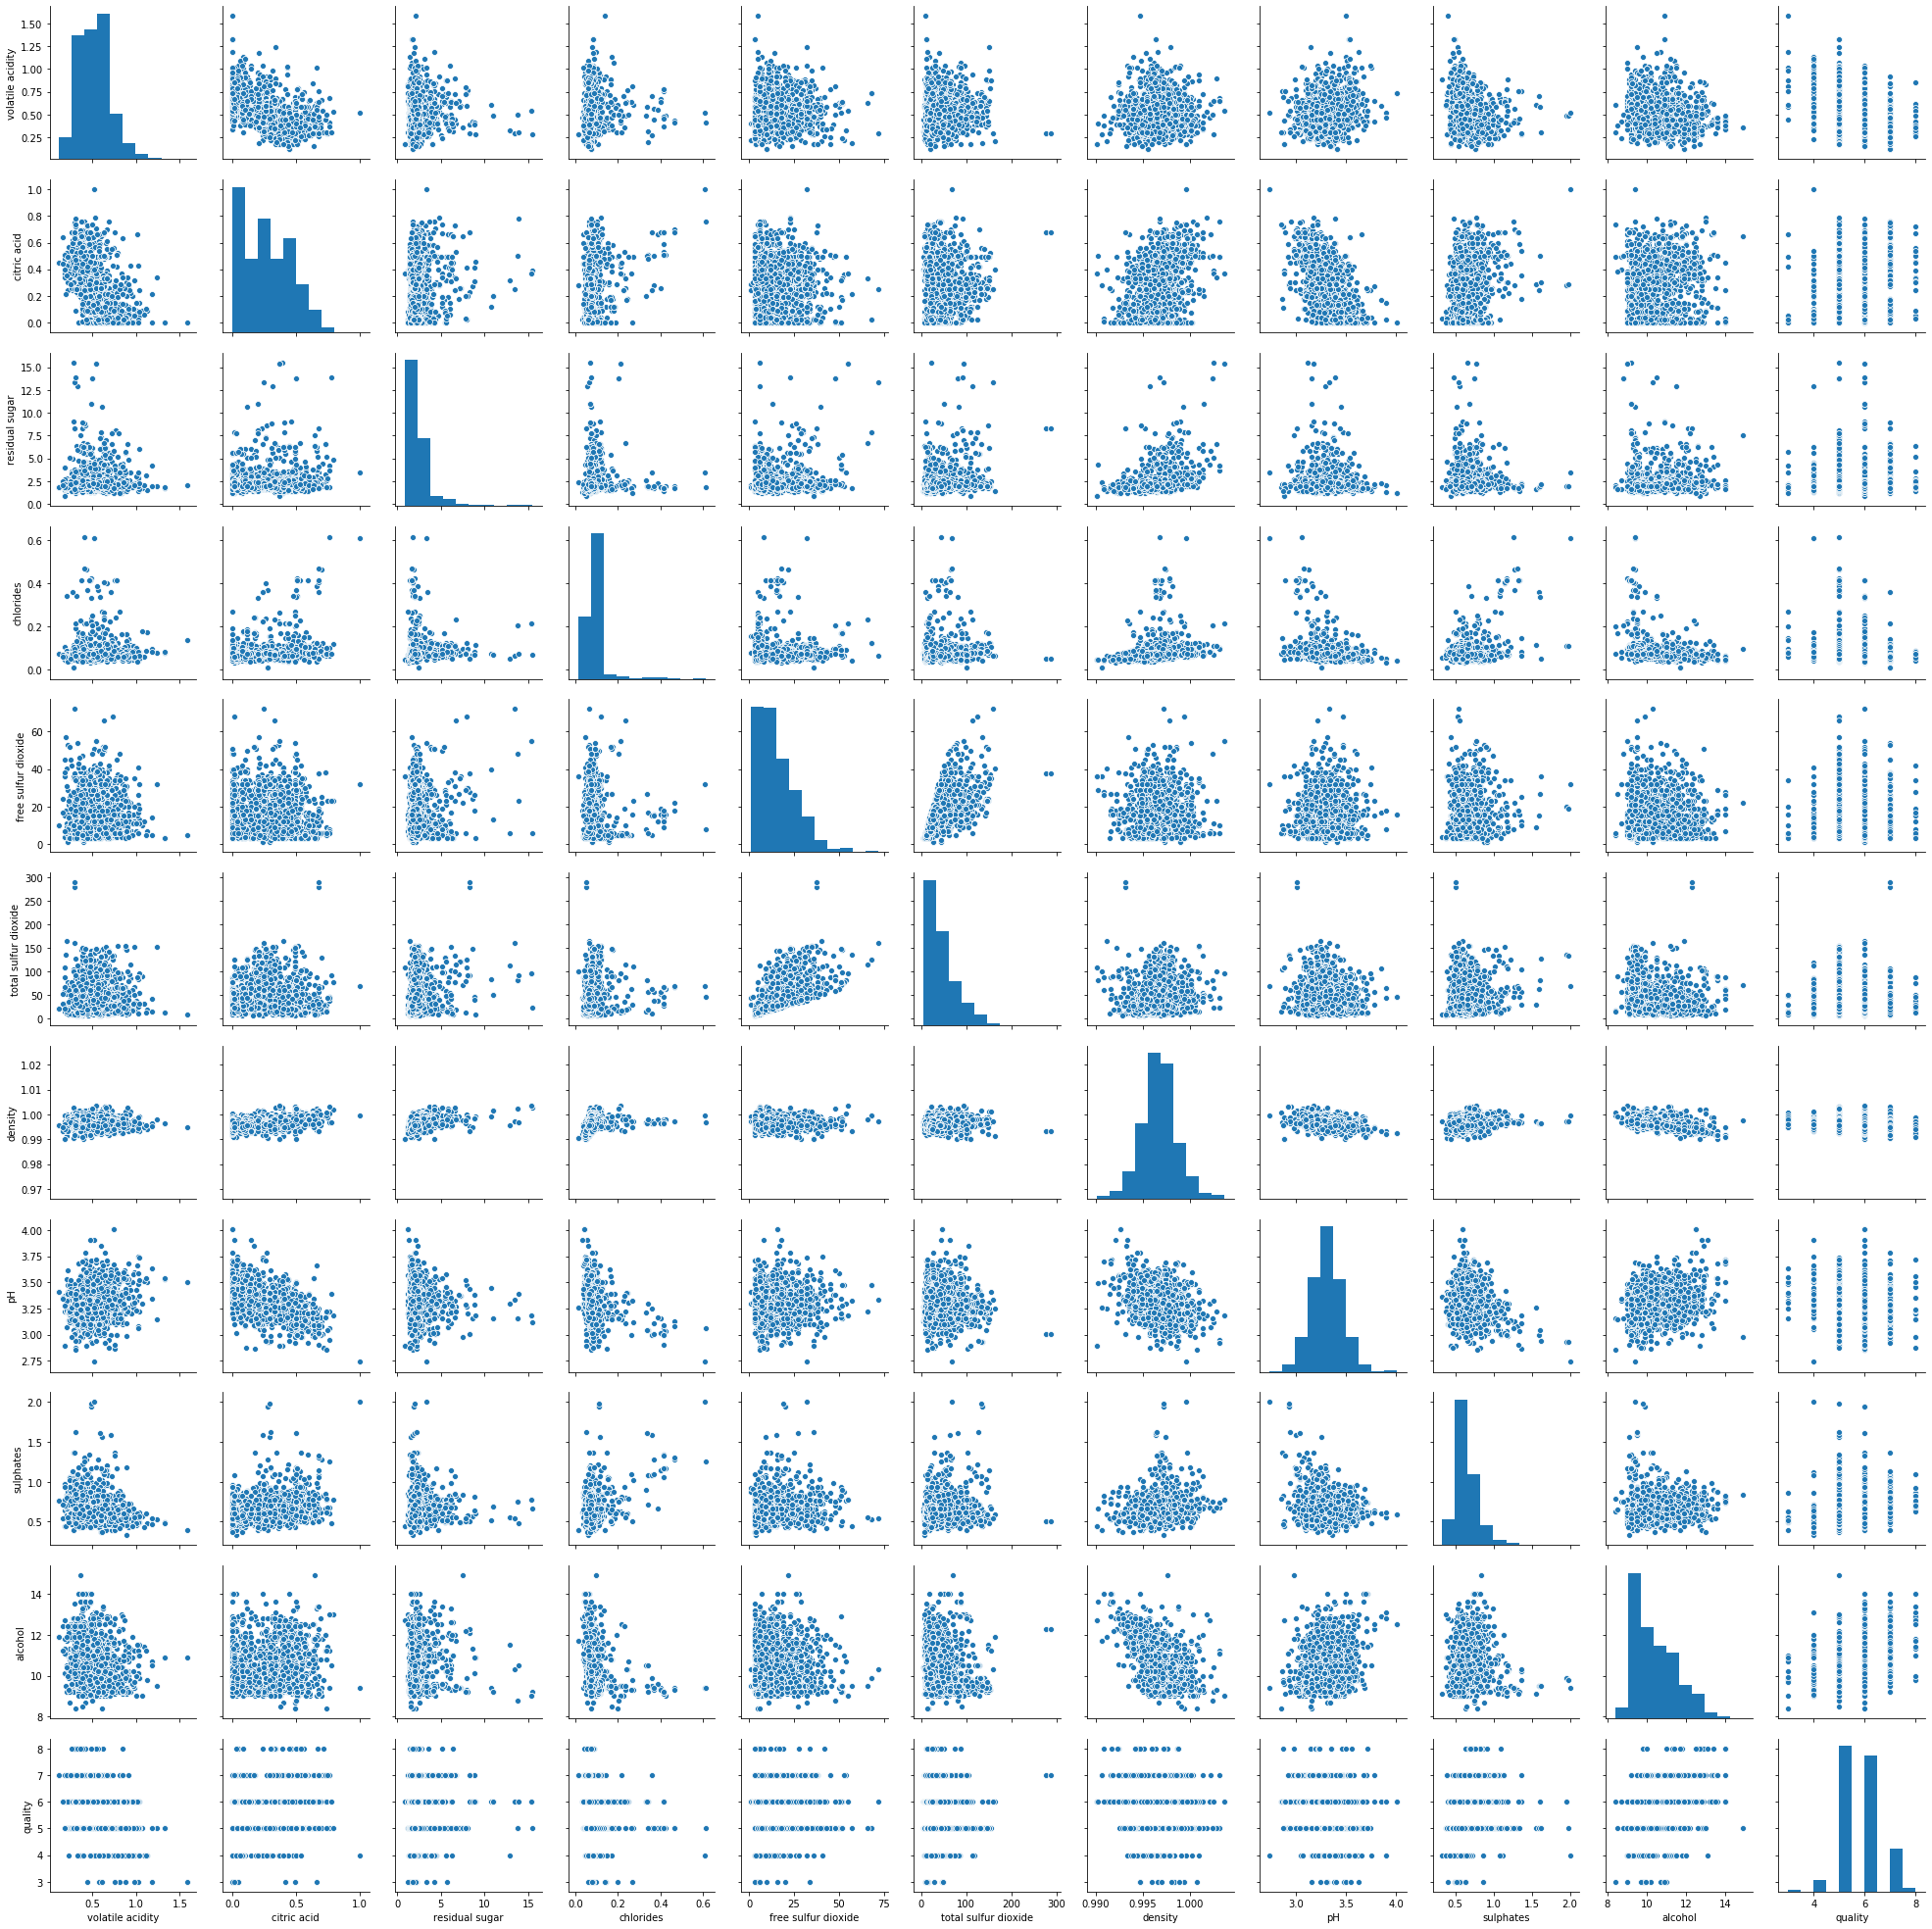

In [41]:
sns.pairplot(df)

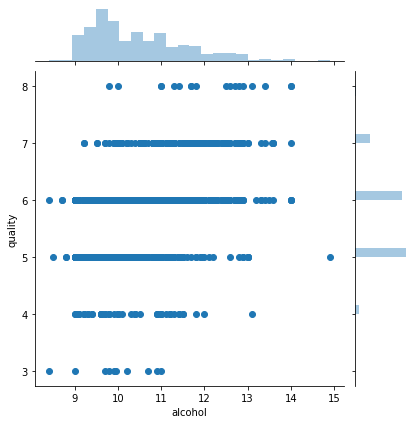

In [42]:
sns.jointplot(x='alcohol',y='quality',data=df,kind='scatter')

In [46]:
from sklearn.preprocessing import StandardScaler

In [48]:
scaler = StandardScaler()

In [49]:
scaler.fit(df.drop('quality',axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [50]:
scaled_features = scaler.transform(df.drop('quality',axis=1))

In [51]:
df_feat = pd.DataFrame(scaled_features,columns=df.columns[:-1])
df_feat.head()

volatile acidity  citric acid  residual sugar  chlorides  \
0          0.961877    -1.391472       -0.453218  -0.243707   
1          1.967442    -1.391472        0.043416   0.223875   
2          1.297065    -1.186070       -0.169427   0.096353   
3         -1.384443     1.484154       -0.453218  -0.264960   
4          0.961877    -1.391472       -0.453218  -0.243707   

   free sulfur dioxide  total sulfur dioxide   density        pH  sulphates  \
0            -0.466193             -0.379133  0.558274  1.288643  -0.579207   
1             0.872638              0.624363  0.028261 -0.719933   0.128950   
2            -0.083669              0.229047  0.134264 -0.331177  -0.048089   
3             0.107592              0.411500  0.664277 -0.979104  -0.461180   
4            -0.466193             -0.379133  0.558274  1.288643  -0.579207   

    alcohol  
0 -0.960246  
1 -0.584777  
2 -0.584777  
3 -0.584777  
4 -0.960246

In [53]:
from sklearn.model_selection import train_test_split

In [54]:
X_train, X_test, y_train, y_test = train_test_split(scaled_features,df['quality'],
                                                    test_size=0.30)

In [55]:
from sklearn.neighbors import KNeighborsClassifier

In [56]:
knn = KNeighborsClassifier(n_neighbors=1)

In [57]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [58]:
pred = knn.predict(X_test)

In [59]:
from sklearn.metrics import classification_report,confusion_matrix

In [60]:
print(confusion_matrix(y_test,pred))

[[  0   1   1   2   0   0]
 [  1   3   2   6   0   0]
 [  0   4 134  55   4   0]
 [  0   7  45 115  38   0]
 [  0   1   8  15  31   1]
 [  0   0   1   1   4   0]]


In [61]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         4
           4       0.19      0.25      0.21        12
           5       0.70      0.68      0.69       197
           6       0.59      0.56      0.58       205
           7       0.40      0.55      0.47        56
           8       0.00      0.00      0.00         6

    accuracy                           0.59       480
   macro avg       0.31      0.34      0.32       480
weighted avg       0.59      0.59      0.59       480



In [62]:
error_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

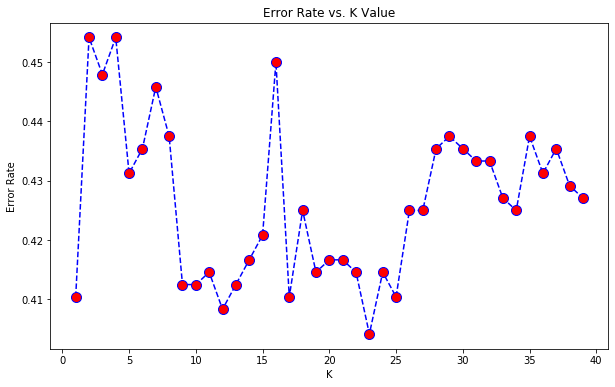

In [63]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [64]:
knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=1')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=1


[[  0   1   1   2   0   0]
 [  1   3   2   6   0   0]
 [  0   4 134  55   4   0]
 [  0   7  45 115  38   0]
 [  0   1   8  15  31   1]
 [  0   0   1   1   4   0]]


              precision    recall  f1-score   support

           3       0.00      0.00      0.00         4
           4       0.19      0.25      0.21        12
           5       0.70      0.68      0.69       197
           6       0.59      0.56      0.58       205
           7       0.40      0.55      0.47        56
           8       0.00      0.00      0.00         6

    accuracy                           0.59       480
   macro avg       0.31      0.34      0.32       480
weighted avg       0.59      0.59      0.59       480



In [65]:
knn = KNeighborsClassifier(n_neighbors=23)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=23')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=23


[[  0   0   3   1   0   0]
 [  0   0   9   3   0   0]
 [  0   0 150  44   3   0]
 [  0   0  75 114  16   0]
 [  0   0   8  26  22   0]
 [  0   0   0   1   5   0]]


              precision    recall  f1-score   support

           3       0.00      0.00      0.00         4
           4       0.00      0.00      0.00        12
           5       0.61      0.76      0.68       197
           6       0.60      0.56      0.58       205
           7       0.48      0.39      0.43        56
           8       0.00      0.00      0.00         6

    accuracy                           0.60       480
   macro avg       0.28      0.29      0.28       480
weighted avg       0.56      0.60      0.58       480



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
